In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess

os.chdir("/Users/davidcoope/Desktop/BayesianOptimiser")
import BOPackage

In [2]:
def Rosenbrock(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    
    # Calculate the function value
    y = (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2
    
    # Add the constraint
    constraint = np.abs(np.maximum(x1, x2)) - 1 > 0
    y[constraint] = 3000  # Apply penalty for constraint violation

    # Make function negative to find the minimum
    y = -y.reshape(-1, 1)
    
    return y

bounds = np.array([[-2.048, 2.048], [-2.048, 2.048]])
length_scale = 1

def Test(X):

    y = X[0]+X[1]
    return y

X = np.array([[0,0]])
print(Test(X))

IndexError: index 1 is out of bounds for axis 0 with size 1

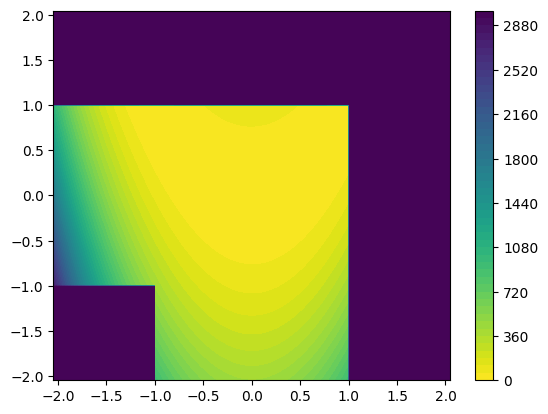

In [ ]:
X1 = np.linspace(bounds[0,0], bounds[0,1], 501, endpoint=True)
X2 = np.linspace(bounds[1,0], bounds[1,1], 501, endpoint=True)

# Create the meshgrid
X1_grid, X2_grid = np.meshgrid(X1, X2)

# Combine the grid into an n**2 x 2 matrix
candidate_x = np.c_[X1_grid.ravel(), X2_grid.ravel()]

result = -Rosenbrock(candidate_x).reshape(X1_grid.shape)

# Plot the contour
contour = plt.contourf(X1, X2, result, levels=50, cmap='viridis_r')

# Add a color bar
plt.colorbar(contour)

# Show the plot
plt.show()

In [ ]:
"""
Configure the optimiser.
"""
ObjectiveFunction = Rosenbrock

random_seed = 40

Kernel = BOPackage.RBF_Kernel

AcquisitionFunction = BOPackage.UpperConfidenceBound
max_kappa = 1
min_kappa = 0.05

acquisition_samples = 100
reduce_bounds_factor = 0.5

# log_path = '/Users/davidcoope/Desktop/BayesianOptimiser/BraninHoo/BOlog.log'

# if os.path.exists(log_path):   
#     subprocess.run(['rm', '-rf', log_path], check=True, text=True, capture_output=True)  

In [ ]:
"""
Configure the optimiser for the standard configuration.
"""

dynamic_bounds = False

# Create the object
bo1 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=None,
                  first_reduce_bounds=None,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo1.GetRandomXBatch(1)
raw_y = ObjectiveFunction(raw_X)
bo1.UpdateData(raw_X, raw_y)

print(raw_y)

for i in range(299):
    raw_X = bo1.GetNextX(kappa=0.1)
    raw_y = ObjectiveFunction(np.array(raw_X))
    bo1.UpdateData(raw_X, raw_y)

bo1.PrintCurrentStatus()
print(bo1.bounds)
# BOPackage.PlotData(bo1)

BO1 = bo1.BestData()[1][0]

[[-387.70376597]]
Current best y value was [-0.06181773]; the corresponding X values were [0.7897905  0.61049134]
[[-2.048  2.048]
 [-2.048  2.048]]


In [ ]:
"""
Configure the optimiser with bounds.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 30
first_reduce_bounds = 100  

# Create the object
bo2 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo2.GetRandomXBatch(1)
raw_y = ObjectiveFunction(raw_X)
bo2.UpdateData(raw_X, raw_y)

for i in range(299):
    raw_X = bo2.GetNextX(kappa=0.1)
    raw_y = ObjectiveFunction(np.array(raw_X))
    bo2.UpdateData(raw_X, raw_y)

bo2.PrintCurrentStatus()
print(bo2.bounds)
# BOPackage.PlotData(bo2)

BO2 = bo2.BestData()[1][0]

Current best y value was [-0.08115795]; the corresponding X values were [0.71512096 0.51153503]
The bounds have been reduced 3 times
[[0.47013395 0.98213395]
 [0.25751254 0.76951254]]


In [ ]:
"""
Configure the optimiser with batch sampling.
"""

dynamic_bounds = False

# Create the object
bo3 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo3.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo3.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo3.GetNextXBatch(10, sub_batch_size=10, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo3.UpdateData(raw_X, raw_y)

bo3.PrintCurrentStatus()
print(bo3.bounds)
# BOPackage.PlotData(bo3)

BO3 = bo3.BestData()[1][0]

Current best y value was [-2.29121332]; the corresponding X values were [-0.50827231  0.24556266]
[[-2.048  2.048]
 [-2.048  2.048]]


In [ ]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo6 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo6.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo6.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo6.GetNextXBatch(10, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo6.UpdateData(raw_X, raw_y)

bo6.PrintCurrentStatus()
print(bo6.bounds)
# BOPackage.PlotData(bo5)

BO6 = bo6.BestData()[1][0]

Current best y value was [-0.24895603]; the corresponding X values were [0.51356778 0.2748603 ]
The bounds have been reduced 2 times
[[-0.50827231  0.51572769]
 [-0.21742593  0.80657407]]


In [ ]:
"""
Configure the optimiser with sub-batch sampling.
"""

dynamic_bounds = False

# Create the object
bo4 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo4.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo4.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo4.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo4.UpdateData(raw_X, raw_y)

bo4.PrintCurrentStatus()
print(bo4.bounds)
# BOPackage.PlotData(bo4)

BO4 = bo4.BestData()[1][0]

Current best y value was [-0.35763952]; the corresponding X values were [0.40296815 0.16583658]
[[-2.048  2.048]
 [-2.048  2.048]]


In [ ]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo5 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo5.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo5.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo5.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo5.UpdateData(raw_X, raw_y)
    

bo5.PrintCurrentStatus()
print(bo5.bounds)
# BOPackage.PlotData(bo5)

BO5 = bo5.BestData()[1][0]

Current best y value was [-0.84894996]; the corresponding X values were [ 0.08383046 -0.00276191]
The bounds have been reduced 5 times
[[-0.04188552  0.08611448]
 [-0.05086261  0.07713739]]


In [ ]:
"""
Configure the optimiser with sub-batch sampling.
"""

dynamic_bounds = False

# Create the object
bo7 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo7.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo7.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo4.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo7.UpdateData(raw_X, raw_y)

bo7.PrintCurrentStatus()
print(bo7.bounds)
# BOPackage.PlotData(bo4)

BO7 = bo7.BestData()[1][0]

Current best y value was [-0.35763952]; the corresponding X values were [0.40296815 0.16583658]
[[-2.048  2.048]
 [-2.048  2.048]]


In [ ]:
"""
Configure the optimiser with sub-batch sampling and bounds reduction.
"""

dynamic_bounds = True
iterations_between_reducing_bounds = 3
first_reduce_bounds = 10 

# Create the object
bo8 = BOPackage.BO(KernelFunction=Kernel, 
                  length_scale=length_scale, 
                  AcquisitionFunction=AcquisitionFunction, 
                  bounds=bounds, 
                  acquisition_samples=acquisition_samples,
                #   log_path=log_path,
                  dynamic_bounds=dynamic_bounds,
                  iterations_between_reducing_bounds=iterations_between_reducing_bounds,
                  first_reduce_bounds=first_reduce_bounds,
                  reduce_bounds_factor=reduce_bounds_factor,
                  random_seed=random_seed)

raw_X = bo8.GetRandomXBatch(10)
raw_y = ObjectiveFunction(raw_X)
bo8.UpdateData(raw_X, raw_y)

for i in range(29):
    raw_X = bo8.GetNextXBatch(10, sub_batch_size=2, max_kappa=max_kappa, min_kappa=min_kappa)
    raw_y = ObjectiveFunction(raw_X)
    bo8.UpdateData(raw_X, raw_y)
    

bo8.PrintCurrentStatus()
print(bo8.bounds)
# BOPackage.PlotData(bo5)

BO8 = bo8.BestData()[1][0]

Current best y value was [-0.84894996]; the corresponding X values were [ 0.08383046 -0.00276191]
The bounds have been reduced 5 times
[[-0.04188552  0.08611448]
 [-0.05086261  0.07713739]]


In [ ]:
print(BO1, BO2, BO3, BO6, BO4, BO5, BO7, BO8)

[-0.06181773] [-0.08115795] [-2.29121332] [-0.24895603] [-0.35763952] [-0.84894996] [-0.35763952] [-0.84894996]
